### Pair programming - Métricas de Regresión Lineal

En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:


- Calculéis las métricas para vuestro modelo

- Discutid los resultados de las métricas y extraed conclusiones

- Guardad los resultados de las métricas en un csv para usarlo más adelante.


In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [82]:
df = pd.read_csv("data/adults_encoding.csv", index_col = 0)
df.head()

,education_yrs,capital_gain,capital_lost,hours_week,salary,gender_map,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
39,,,,,,,,,,,,,,,,,,,,,
50,-0.333333,0.0,0.0,-2.0,24006,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,0.666667,0.0,0.0,0.0,44640,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53,-0.333333,0.0,0.0,4.0,18011,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,-0.333333,0.0,0.0,0.0,29747,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0.000000,0.0,0.0,-0.4,19350,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
df.head()

,education_yrs,capital_gain,capital_lost,hours_week,salary,gender_map,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
39,,,,,,,,,,,,,,,,,,,,,
50,-0.333333,0.0,0.0,-2.0,24006,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38,0.666667,0.0,0.0,0.0,44640,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53,-0.333333,0.0,0.0,4.0,18011,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,-0.333333,0.0,0.0,0.0,29747,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0.000000,0.0,0.0,-0.4,19350,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
x = df.drop("salary", axis = 1)
y = df["salary"]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [86]:
#iniciamos el modelo 
lr = LinearRegression()

In [87]:
#entrenamos el modelo 
lr.fit(x_train, y_train)

LinearRegression()

In [88]:
# Realizamos las predicciones con nuestro modelo
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [89]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
39,,,
20,40067,31842.448028,Train
21,32109,25478.439508,Train
64,36787,69284.634111,Train
26,44965,46745.771675,Train
21,45074,73285.110421,Train


In [90]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(20)

,Real,Predicted,Set,residuos
39,,,,
64,40937,79394.115598,Train,-38457.115598
19,26603,30916.920846,Train,-4313.920846
44,30229,85719.462777,Train,-55490.462777
32,40830,79080.705780,Train,-38250.705780
19,47892,38724.314315,Test,9167.685685
31,22110,121491.132444,Train,-99381.132444
53,47614,78090.394490,Train,-30476.394490
22,46853,97068.249510,Train,-50215.249510
66,21159,32540.602017,Test,-11381.602017


Si el residuo es negativo, eso quiere decir que el valor de y está sobreestimado, en este caso esto nos quiere decir que los salarios están siendo representados como más de su valor.

<AxesSubplot:xlabel='Real', ylabel='Predicted'>

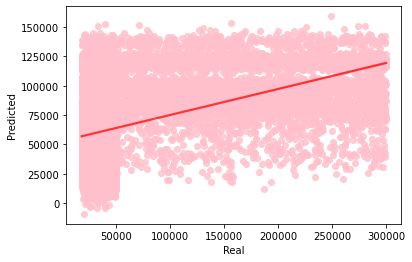

In [91]:
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted",
            color = "pink",
            line_kws = {"color": "red", "alpha": 0.7 })

<AxesSubplot:xlabel='Real', ylabel='Predicted'>

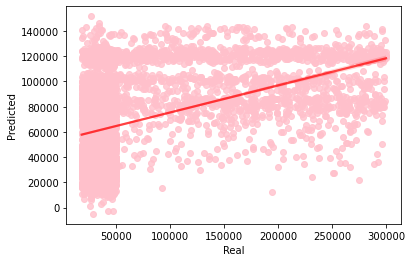

In [92]:
sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "pink",
            line_kws = {"color": "red", "alpha": 0.7 })


In [93]:
# Validación cruzada repetida con una única métrica

cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = x, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-62040.64866056 -61250.18396476 -61298.48044281 -63584.87642416
 -61131.66402667 -62196.78037616 -61373.74068006 -62475.96304974
 -63801.78319081 -64498.27007999]
Média métricas de validación cruzada: -62365.2390895728


In [94]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = x,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.329680,0.010895,0.231602,-62040.648661
1,0.274853,0.010365,0.215618,-61250.183965
2,0.354816,0.019712,0.206403,-61298.480443
3,0.358141,0.006308,0.211162,-63584.876424
4,0.493583,0.012221,0.214309,-61131.664027
5,0.347321,0.011516,0.199876,-62196.780376
6,0.310150,0.013344,0.217076,-61373.740680
7,0.271199,0.013445,0.222564,-62475.963050
8,0.266967,0.015758,0.221129,-63801.783191
9,0.315807,0.011552,0.203389,-64498.270080


In [95]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.2215577534843748
El MAE es 43425.34172733088
El MSE es 3882590848.8526335
EL RMSE es  62310.43932482448
Para el conjunto test:---------------
El valor de r2 score es  0.2033853077523291
El MAE es 43684.74071447039
El MSE es 3837400140.8751683
EL RMSE es  61946.75246431542


In [96]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,43684.740714,3.837400e+09,61946.752464,0.203385,test,Linear Regresion
1,43425.341727,3.882591e+09,62310.439325,0.221558,train,LinearRegression


In [101]:
resultados = pd.read_csv("data/adults.resultados_metricas.csv")

<AxesSubplot:xlabel='residuos', ylabel='Count'>

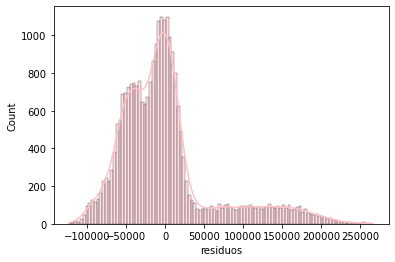

In [102]:
sns.histplot(resultados[resultados['Set'] == "Train"],
             x = "residuos",
             color = "pink",
             kde=True)

<AxesSubplot:xlabel='residuos', ylabel='Count'>

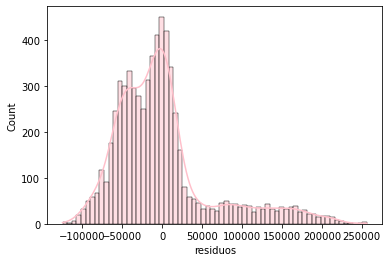

In [103]:
sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "pink",
             kde=True)

In [104]:
print(f'La media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'La media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

La media para el r2 es 0.21
La media para el RMSE es 62365.24


Esto quiere decir que nuestras variables predictoras son capaces de explicar un 21% la variable respuesta.

El RMSE debería estar cerca de 0 si estuviera dándonos buenos resultados, pero en cambio está en 62365, lo cual nos indica que nuestro modelo no está haciendo, ni de lejos, buenas predicciones. Esto confirma nuesra hipótesis de que esta base de datos no es apta para un modelo de regresión lineal.